In [1]:
# ramen ratings 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

#pip install wordcloud


In [3]:
# Load the dataset
df = pd.read_csv('Datasets/global-ramen-ratings.csv')

df.head()


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
df.info()
# df.dtypes

#check missing values
print("Missing Values")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB
Missing Values
Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64


In [5]:
# convert data types

#coerce for unrated into NAN
df['Stars'] = pd.to_numeric(df['Stars'], errors = 'coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


In [6]:
#print(df.isnull().sum())
print(df.isnull().sum()[df.isnull().sum() > 0])


Style         2
Stars         3
Top Ten    2539
dtype: int64


In [7]:
#check/view missing data for Style OR Stars
missing_data = df[df['Style'].isnull() | df['Stars'].isnull()]
missing_data



,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,NaN
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00,NaN


In [8]:
#replace missing style values with pack after doing google search
# Replace NaN with 'Pack'
df['Style'].fillna('Pack', inplace = True)

# Check if NaN is replaced
target = ['E Menm Chicken', '100 Furong Shrimp']
df.loc[df['Variety'].isin(target)]

C:\Users\keega\AppData\Local\Temp\ipykernel_22452\4204526302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Style'].fillna('Pack', inplace = True)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,Pack,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,Pack,Taiwan,3.00,NaN


In [9]:
#Fill missing data 
#df[['Style', 'Stars']] = df[['Style', 'Stars']].fillna('unknown')

df['Stars'] = df['Stars'].fillna('unknown')
df.head()

#print(df.isnull().sum()[df.isnull().sum() > 0])


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.0,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [10]:
# Dropping 'Top Ten' column, not needed 
#df.drop(columns = ['Top Ten'], inplace = True)
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.0,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [11]:
#check which brand has the most reviews

top_reviews = df['Brand'].value_counts().head(10)
print(top_reviews)

Brand
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Lucky Me!         34
Name: count, dtype: int64


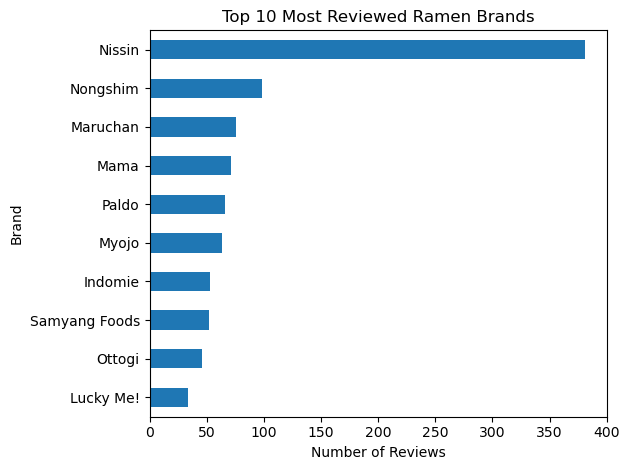

In [12]:
# Plot
#top_reviews.plot(kind='bar')
top_reviews.plot(kind='barh')


# graph styling
plt.title('Top 10 Most Reviewed Ramen Brands')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
#plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis() #starts with highest

plt.tight_layout()

# Show it
plt.show()

In [13]:
#top countries
top_Country = df['Country'].value_counts().head(10)
print(top_Country)

Country
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Name: count, dtype: int64


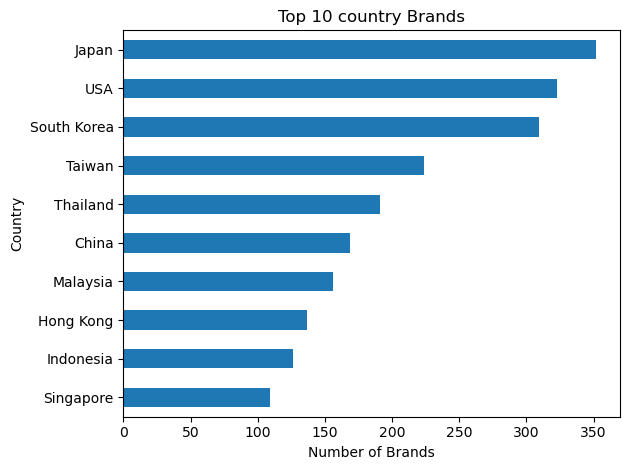

In [14]:
# Plot
#top_reviews.plot(kind='bar')
top_Country.plot(kind='barh')


# graph styling
plt.title('Top 10 country Brands')
plt.xlabel('Number of Brands')
plt.ylabel('Country')
#plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis() #starts with highest

plt.tight_layout()

# Show it
plt.show()

In [15]:
#popular style of ramen
top_style = df['Style'].value_counts()
top_style

Style
Pack    1533
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

In [16]:
# Force 'Stars' to be numeric, and turn errors into NaN as some values are string.
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Rank ramen by Stars column
ramen_sort = df.sort_values('Stars', ascending = False).dropna(subset = ['Stars'])

ramen_sort.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.0,2013 #1
448,2132,Maruchan,Instant Lunch Chipotle Chicken Flavor Ramen No...,Cup,USA,5.0,NaN
486,2094,Nongshim,Champong Noodle Soup Spicy Seafood Flavor,Pack,South Korea,5.0,NaN
485,2095,Nissin,Straits Kitchen Laksa,Pack,Singapore,5.0,NaN
1616,964,Nissin,Raoh Backfat Rich Soy Sauce Flavor,Bowl,Japan,5.0,NaN
483,2097,CarJEN,Otentiq Cheezy Mushroom Instant Noodles (Impro...,Pack,Malaysia,5.0,NaN
482,2098,Nongshim,Kimchi Flavor Noodle Soup,Cup,USA,5.0,NaN
1035,1545,Nanyang Chef,Penang Asam Pedas Hot & Sour Noodle,Pack,Malaysia,5.0,NaN
478,2102,Nissin,Cup Noodles Singapore Laksa,Cup,Japan,5.0,NaN
1602,978,Sun Noodle,Ramen Pork Flavor,Tray,USA,5.0,NaN


In [17]:
# Rank ramen by Stars column
ramen_sort = df.sort_values('Stars', ascending = False).dropna(subset = ['Stars'])

# Showing top 100 
ramen_top = ramen_sort.head(100)
ramen_top

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.0,2013 #1
448,2132,Maruchan,Instant Lunch Chipotle Chicken Flavor Ramen No...,Cup,USA,5.0,NaN
486,2094,Nongshim,Champong Noodle Soup Spicy Seafood Flavor,Pack,South Korea,5.0,NaN
485,2095,Nissin,Straits Kitchen Laksa,Pack,Singapore,5.0,NaN
1616,964,Nissin,Raoh Backfat Rich Soy Sauce Flavor,Bowl,Japan,5.0,NaN
...,...,...,...,...,...,...,...
288,2292,Sichuan Baijia,Chongqing Noodles Spicy Hot Flavor,Pack,China,5.0,NaN
287,2293,Nissin,Nupasta Bacon In Carbonara Sauce Flavour Insta...,Pack,Hong Kong,5.0,NaN
1173,1407,Annie Chun's,Ramen House Thai Coconut Ramen,Pack,USA,5.0,NaN
1493,1087,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.0,2014 #1


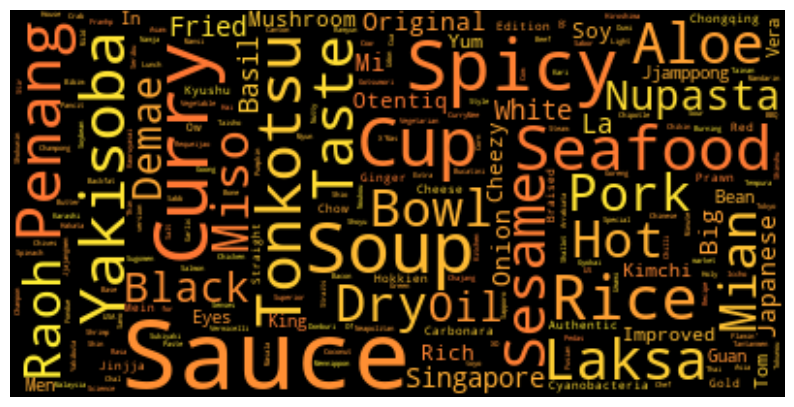

In [20]:
# Join the top 100 ramen product name into a string
ramen_top_str = ramen_top['Variety'].str.cat(sep=',')

# For generate color
def color_func(word, font_size, position, orientation, random_state=None,\
                    **kwargs):
    return "hsl(%d, 100%%, 60%%)" % random.randint(20, 55)

# Plot word cloud of the top 100
stopword_list = ['Noodle', 'Noodles', 'Instant Noodle', 'Instant', 'Flavor', 'Flavour', 'Ramen', 'With']
plt.figure(figsize=(10,6))
top_wordcloud = WordCloud(max_font_size= 50, background_color='black', \
                      prefer_horizontal = 0.7, stopwords = stopword_list).generate(ramen_top_str)
plt.imshow(top_wordcloud.recolor(color_func = color_func, random_state = 3), interpolation='bilinear')
plt.axis('off')
plt.show()